In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

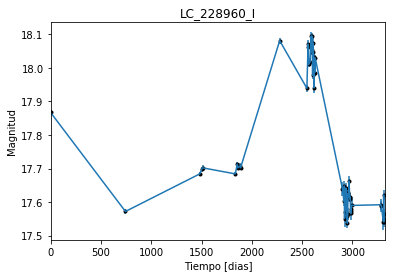

In [2]:
data = np.genfromtxt('LC_228960_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_228960_I')
plt.savefig("LC_228960_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

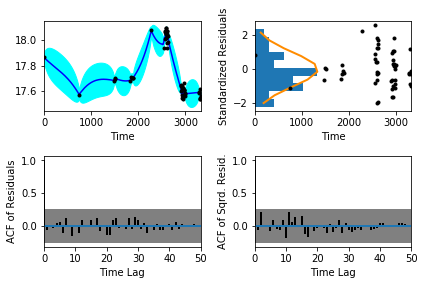

In [5]:
sample.assess_fit()

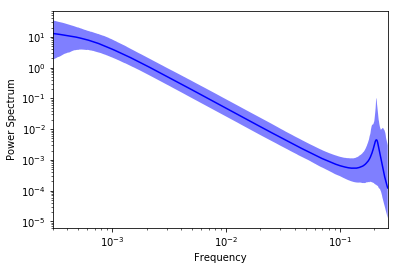

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

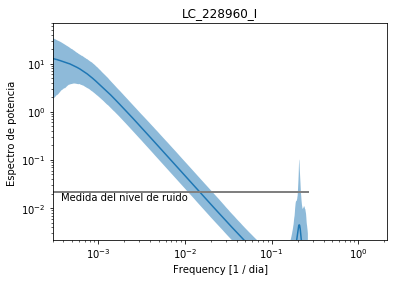

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_228960_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_228960_I')

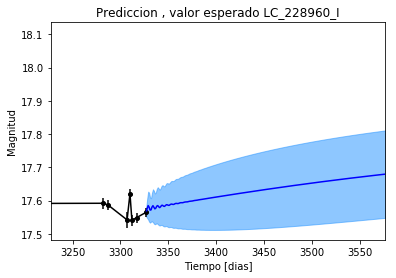

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_228960_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_228960_I')

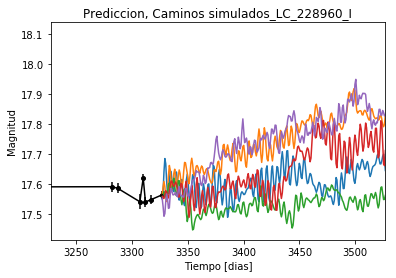

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_228960_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


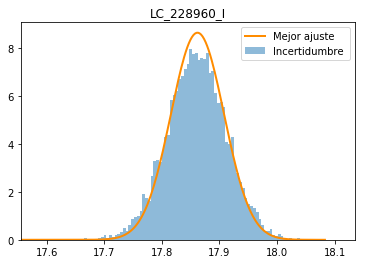

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_228960_I')
plt.savefig("Mejor_ajuste_LC_228960_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_228960_I')

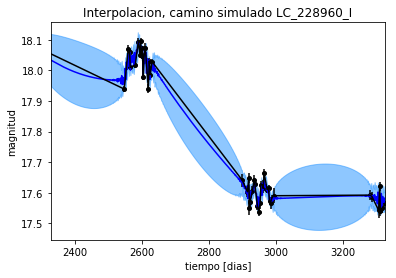

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228960_I')

Text(0.5,1,'Interpolacion, camino simulado LC_228960_I')

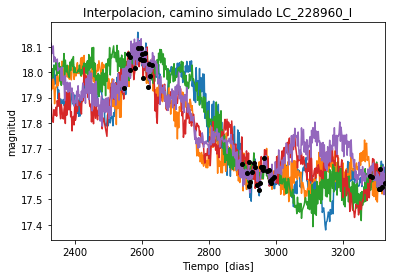

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_228960_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 856.880350621
Median: 0.0077561613455
Standard deviation: 0.00921079434932
68% credibility interval: [ 0.00307697  0.01656081]
95% credibility interval: [ 0.00075908  0.03287671]
99% credibility interval: [ 0.00049156  0.05003704]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 856.880350621
Median: 0.0077561613455
Standard deviation: 0.00921079434932
68% credibility interval: [ 0.00307697  0.01656081]
95% credibility interval: [ 0.00075908  0.03287671]
99% credibility interval: [ 0.00049156  0.05003704]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 228.322039757
Median: 0.189828993
Standard deviation: 0.15912859977
68% cre

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 536.568138622
Median: 109.216010684
Standard deviation: 2.1073115731
68% credibility interval: [ 106.87841899  110.90118244]
95% credibility interval: [ 103.96099927  112.09870358]
99% credibility interval: [ 101.72890126  112.37124372]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 251.435645353
Median: 1.28037633364
Standard deviation: 0.991969634117
68% credibility interval: [ 0.23679384  2.59149618]
95% credibility interval: [ 0.07778355  3.28577035]
99% credibility interval: [ 0.0547896  3.4381643]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 352.914148147
Median: 1.88695030011
Standard deviation: 0.98893614985
68% credibility interval: [ 1.7078368   2.40986929]
95% credibility interval: [ 1.45877359  6.629

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 579.175311228
Median: 4.11016327312e-17
Standard deviation: 1.29404452869e+67
68% credibility interval: [  1.69344732e-57   6.58732753e+16]
95% credibility interval: [  2.01462028e-124   6.44693227e+059]
99% credibility interval: [  2.59289488e-171   8.40308514e+067]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2478.01290301
Median: 17.7515670101
Standard deviation: 0.0786908422375
68% credibility interval: [ 17.67511389  17.8113927 ]
95% credibility interval: [ 17.56810761  17.90270147]
99% credibility interval: [ 17.49934793  17.95761423]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1235.5458287
Median: 0.21112237421
Standard deviation: 0.0397027229846
68% credibility interval: [ 0.2031686   0.23612978]
95% credibility interval: [ 0.18843634  0.40650478]
99% credibility interval: [ 0.16269499  0.42329113]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1235.5458287
Median: 0.21112237421
Standard deviation: 0.0397027229846
68% credibility interval: [ 0.2031686   0.23612978]
95% credibility interval: [ 0.18843634  0.40650478]
99% credibility interval: [ 0.16269499  0.42329113]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 210.342288941
Median: 0.0
Standard deviation: 0.000187534431436
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 536.568138622
Median: 109.216010684
Standard deviation: 2.1073115731
68% credibility interval: [ 106.87841899  110.90118244]
95% credibility interval: [ 103.96099927  112.09870358]
99% credibility interval: [ 101.72890126  112.37124372]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 304.322865116
Median: 0.0291323637876
Standard deviation: 0.0137356628319
68% credibility interval: [ 0.0196192   0.04466044]
95% credibility interval: [ 0.01381644  0.06634503]
99% credibility interval: [ 0.01193979  0.08740414]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 655.848154084
Median: 1.05885898211
Standard deviation: 0.240897967821
68% credibility interval: [ 0.85685674  1.32071806]
95% credibility interval: [ 0.72029735  1.6596675 ]
99% credibility interval: [ 0.64413474  1.86956029]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 695.175300346
Median: 0.0282929913924
Standard deviation: 0.0411005111391
68% credibility interval: [  3.88181550e-19   6.34773702e-02]
95% credibility interval: [  4.05939916e-62   1.59038059e-01]
99% credibility interval: [  3.17721198e-70   2.51895311e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 856.880350621
Median: (-0.0487333990061-1.26435292167j)
Standard deviation: 0.256084700515
68% credibility interval: [-0.10405466-1.3802705j  -0.01933316-1.32827069j]
95% credibility interval: [-0.20657043-1.3676236j  -0.00476942-1.31054979j]
99% credibility interval: [-0.31439198-1.7612253j  -0.00308855-1.31328209j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 856.880350621
Median: (-0.0487333990061+1.26435292167j)
Standard deviation: 0.256084700515
68% credibility interval: [-0.10405466+1.3802705j  -0.01933316+1.32827069j]
95% credibility interval: [-0.20657043+1.3676236j  -0.00476942+1.31054979j]
99% credibility interval: [-0.31439198+1.7612253j  -0.00308855+1.31328209j]
Posterior summary for parameter ar_roots  